# 3. Checking Similarity between Original and Synthetic Data – Using Coverage Measurement

- One of the methods of examining the statistical similarity between real and synthetic data is to measure the value range of real data that is covered by synthetic data.
- Generally, the wider the range covered by the synthetic data, the more similar the two datasets. 
- In this lesson, we will calculate for each column the coverage range of the generated synthetic data against the original data. 

## Load Library

- In this lesson, we will use coverage to verify the similarity between synthetic and original data. With the provided code, you can install the library necessary for calculating the coverage. If you do not have this library installed, please uncomment the code and execute it.

In [1]:
# !pip install sdmetrics

     ------------------------------------- 170.7/170.7 kB 10.0 MB/s eta 0:00:00
     --------------------------------------- 15.6/15.6 MB 46.7 MB/s eta 0:00:00
     ---------------------------------------- 54.6/54.6 kB ? eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0


 ## Load Data

- Let’s import the necessary libraries and data files, and create data copies. 

In [1]:
import pandas as pd
import copy

In [2]:
# Synthetic data
df_syn_01 = pd.read_csv('./data_sample/df_syn_en_15.csv', encoding='utf-8-sig')

In [3]:
# Original data
df_syn_base = pd.read_csv('df_syn_en.csv', encoding='utf-8-sig') 

In [4]:
copy_syn = copy.deepcopy(df_syn_01)

In [5]:
copy_base = copy.deepcopy(df_syn_base)

## Check the Coverage of Generated Data Against the Real Data

### Check categorical data coverage (using CategoryCoverage)

- To check the coverage of the synthetic data against the original data on categorical columns, we will use the CategoryCoverage metric. 
- This metric measures whether a synthetic column covers all the possible categories present in the corresponding original column.

#### Data Compatibility of CategoryCoverage

- Categorical: This metric is meant for discrete, categorical data
- Boolean: This metric is meant for boolean data


- The plot below illustrates a scenario where the CategoryCoverage score of synthetic data on a specific categorical column in the original data is 0.6. In this plot, the synthetic data includes only 3 out of 5 unique categories present in the original data. In other words, it covers only 60% of the value range found in the original data.

#### Score
- (best) 1.0: The synthetic column contains all the unique categories present in the real column
- (worst) 0.0: The synthetic column contains none of the categories present in the real column

![Category Coverage](https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2F2yn1OQLODOesNLVjnpe2%2FCategory%20Coverage.png?alt=media&token=e12f6f08-d3b0-4e05-9a41-58b8a28d4a4e)

- The CategoryCoverage metric computes the coverage that the synthetic data has over the categories present in a categorical column of the original data. This computation is performed for each categorical column, where the metric first calculates the number of unique categories in a specific column of the original data (a). It then counts the number of those categories present in the corresponding column of the synthetic data (b). Finally, it returns the proportion of categories covered by the synthetic data to the total number of unique categories in the original data (b/a).

In [6]:
# Calculate the coverage score of the ‘dec_customs_code’ column
from sdmetrics.single_column import CategoryCoverage

CategoryCoverage.compute(
    real_data=copy_base['dec_custom_code'],
    synthetic_data=copy_syn['dec_custom_code']
)

0.6976744186046512

### Plot the coverage graph of category type columns

- Let’s now visualize the CategoryCoverage of synthetic data for each categorical column in the original data. First, we will create a dataframe storing the CategoryCoverage scores for categorical columns.

In [7]:
# Generate a dataframe to store coverage scores for numerical columns
CC_score = pd.DataFrame({'Category':[],'Score':[]})

# Assign numerical columns to a variable
Range_columns = ['dec_custom_code','imp_dec_code','imp_trd_code','imp_typ_code',\
                 'collect_code','typ_transport_code','dec_mark','importer','ovs_cust_code',\
                 'exps_carr_code','HS10','country_ship_code','country_orig_code','trff_class_code',\
                 'country_orig_mark_code','crime_yn','key_exposure']

# Calculate coverage scores using the original data’s indices and values, and store them in the dataframe
for idx,val in enumerate(copy_base):
    score = 0 
    if val in Range_columns:
        score = CategoryCoverage.compute(
            real_data=copy_base[val],
            synthetic_data=copy_syn[val]
        )
    CC_score.loc[idx] = [val,score]

- Let’s import the necessary libraries to visualize the dataframe containing coverage scores using a graph.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

- Let’s plot a bar graph using the calculated coverage scores.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'dec_custom_code'),
  Text(1, 0, 'imp_dec_code'),
  Text(2, 0, 'imp_trd_code'),
  Text(3, 0, 'imp_typ_code'),
  Text(4, 0, 'collect_code'),
  Text(5, 0, 'typ_transport_code'),
  Text(6, 0, 'dec_mark'),
  Text(7, 0, 'importer'),
  Text(8, 0, 'ovs_cust_code'),
  Text(9, 0, 'exps_carr_code'),
  Text(10, 0, 'HS10'),
  Text(11, 0, 'country_ship_code'),
  Text(12, 0, 'country_orig_code'),
  Text(13, 0, 'trff_class_code'),
  Text(14, 0, 'country_orig_mark_code'),
  Text(15, 0, 'crime_yn'),
  Text(16, 0, 'key_exposure')])

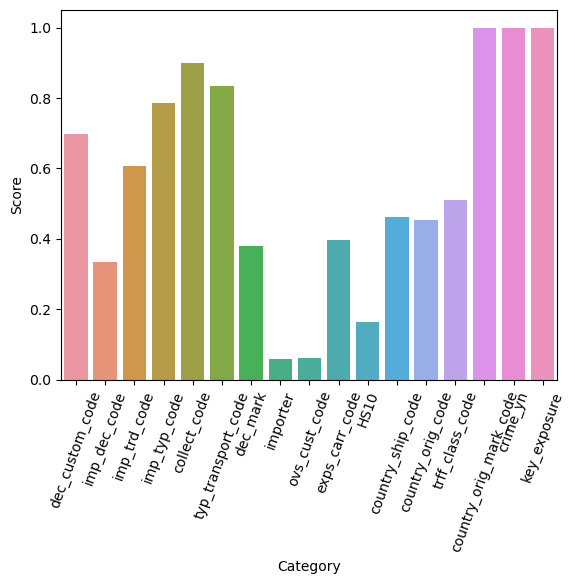

In [9]:
# Since it is impossible to get negative values from the CategoryCoverage score calculation formula, a condition was added when assigning values to the ‘data’ variable to eliminate any potential negative values  
sns.barplot(x='Category',y ='Score', data = CC_score[CC_score['Score'] > 0])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)

### Check numerical data coverage (using RangeCoverage)

- To assess the coverage of synthetic data on numeric columns of the original data, we will use the RangeCoverage metric from the sdmetrics library. This metric measures whether a synthetic column covers the full range of values present in the corresponding original column.

#### Data Compatibility of RangeCoverage
- Numerical : This metric is meant for continuous, numerical data
- Datetime : This metric converts datetime values into numerical values


- The plot below illustrates a case where the RangeCoverage score of synthetic data on a specific numerical column of the original data is 0.82. Here, you can see that the synthetic data covers only a portion (82%) of the value range of the original data.

#### Score
- (best) 1.0: The synthetic column covers the range of values present in the real column
- (worst) 0.0: The synthetic column does not overlap at all with the range of values in the real column


![Value](https://1485348715-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FrNLha4DaPNwVJ930KhmB%2Fuploads%2FUa21ikMRPxduAFIpovjM%2FRange%20Coverage.png?alt=media&token=bb7dca22-ad7d-4521-8523-e683588deb2b)

- Let’s calculate the RangeCoverage score for the 'trff_rate' column.

In [10]:
from sdmetrics.single_column import RangeCoverage

RangeCoverage.compute(
    real_data=copy_base['trff_rate'],
    synthetic_data=copy_syn['trff_rate']
)

0.5001988598700783

### Plot the coverage graph of number type columns

- Let’s now visualize the RangeCoverage of synthetic data for each numerical column in the original data. First, we will create a dataframe storing the RangeCoverage scores for numerical columns.

In [11]:
# Generate a dataframe to store coverage scores for numerical columns
RC_score = pd.DataFrame({'Category':[],'Score':[]})

# Assign numerical columns to a variable
Range_columns = ['trff_rate','dec_weight','taxabal_price_KRW']

# Calculate coverage scores using the original data’s indices and values, and store them in the dataframe
for idx,val in enumerate(copy_base):
    score = 0 
    if val in Range_columns:
        score = RangeCoverage.compute(
            real_data=copy_base[val],
            synthetic_data=copy_syn[val]
        )
    RC_score.loc[idx] = [val,score]

- Let’s plot a bar graph using the calculated coverage scores.
- Among the three columns, the 'trff_rate' column, which has a relatively narrow value distribution, shows a high coverage score.

(array([0, 1, 2]),
 [Text(0, 0, 'trff_rate'),
  Text(1, 0, 'dec_weight'),
  Text(2, 0, 'taxabal_price_KRW')])

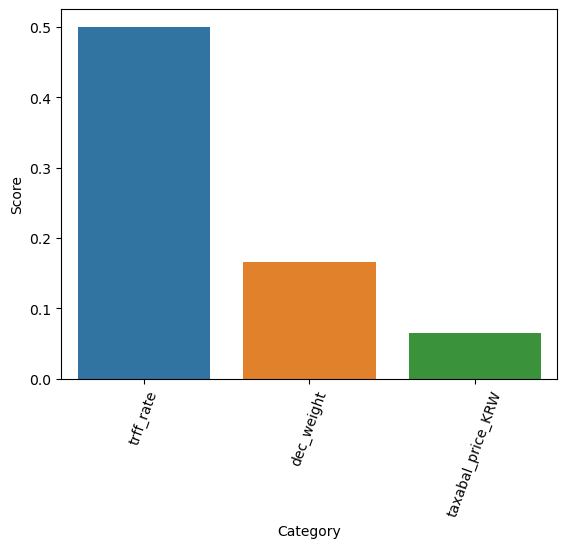

In [12]:
sns.barplot(x='Category',y ='Score', data = RC_score[RC_score['Score'] > 0])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)

## Check Data

- Now, we will combine the 'CC_score' and 'RC_score' dataframes to create a comprehensive coverage score table.  
- Before merging the two dataframes, we will check how each dataframe looks. Let’s first print ‘CC_score’. 

- The output shows that in some rows, the 'Score'   value is missing and represented as 0.00. 
- For the 'dec_num' and 'dec_date' columns, the scores were   not calculated due to their exclusion from the training dataset, resulting in no generation of synthetic data.  
- Additionally, scores were not calculated for the 'tariff_rate', 'dec_weight', and 'taxabal_price_KRW' columns of the 15th, 18th, and 19th rows.


In [16]:
CC_score

,Category,Score
0,dec_num,0.000000
1,dec_date,0.000000
2,dec_custom_code,0.697674
3,imp_dec_code,0.333333
4,imp_trd_code,0.607143
5,imp_typ_code,0.785714
6,collect_code,0.900000
7,typ_transport_code,0.833333
8,dec_mark,0.378837
9,importer,0.057520


- Let’s print ‘RC_score’. 

- The 'RC_score' dataframe has the same indices and 'Category' values as the 'CC_score' dataframe, and has 'Score' values that are not zero for the 'tariff_rate', 'dec_weight', and 'taxabal_price_KRW' columns of the 15th, 18th, and 19th rows.

In [17]:
RC_score

,Category,Score
0,dec_num,0.000000
1,dec_date,0.000000
2,dec_custom_code,0.000000
3,imp_dec_code,0.000000
4,imp_trd_code,0.000000
5,imp_typ_code,0.000000
6,collect_code,0.000000
7,typ_transport_code,0.000000
8,dec_mark,0.000000
9,importer,0.000000


## Combining the Results

### Combine two result dataframes

- Now, we will combine the ‘CC_score’ and ‘RC_score’ to create a complete coverage score table. Let’s merge the two dataframes using the indices of categories that need to be merged (15, 18, 19).

In [18]:
# Assign values from the 'Score' column of ‘RC_score’ at rows 15, 18, and 19 to the corresponding rows in the 'Score' column of ‘CC_score’
CC_score.loc[[15,18,19],'Score'] = RC_score.loc[[15,18,19],'Score']

- Now, we will visualize the coverage scores of all columns. For the 'imp_dec_code' column, a low coverage score is expected due to the bias in the original data. Let’s check once again the count of values in the 'imp_dec_code' column of the original data.

In [19]:
# Count the number of occurrences of each unique value in the ‘imp_dec_code’ column
copy_base['imp_dec_code'].value_counts()

B    53992
D        7
A        1
Name: imp_dec_code, dtype: int64

In [20]:
Total_score = CC_score

- Let’s visualize the coverage scores of all columns using a bar plot.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dec_custom_code'),
  Text(1, 0, 'imp_dec_code'),
  Text(2, 0, 'imp_trd_code'),
  Text(3, 0, 'imp_typ_code'),
  Text(4, 0, 'collect_code'),
  Text(5, 0, 'typ_transport_code'),
  Text(6, 0, 'dec_mark'),
  Text(7, 0, 'importer'),
  Text(8, 0, 'ovs_cust_code'),
  Text(9, 0, 'exps_carr_code'),
  Text(10, 0, 'HS10'),
  Text(11, 0, 'country_ship_code'),
  Text(12, 0, 'country_orig_code'),
  Text(13, 0, 'trff_rate'),
  Text(14, 0, 'trff_class_code'),
  Text(15, 0, 'country_orig_mark_code'),
  Text(16, 0, 'dec_weight'),
  Text(17, 0, 'taxabal_price_KRW'),
  Text(18, 0, 'crime_yn'),
  Text(19, 0, 'key_exposure')])

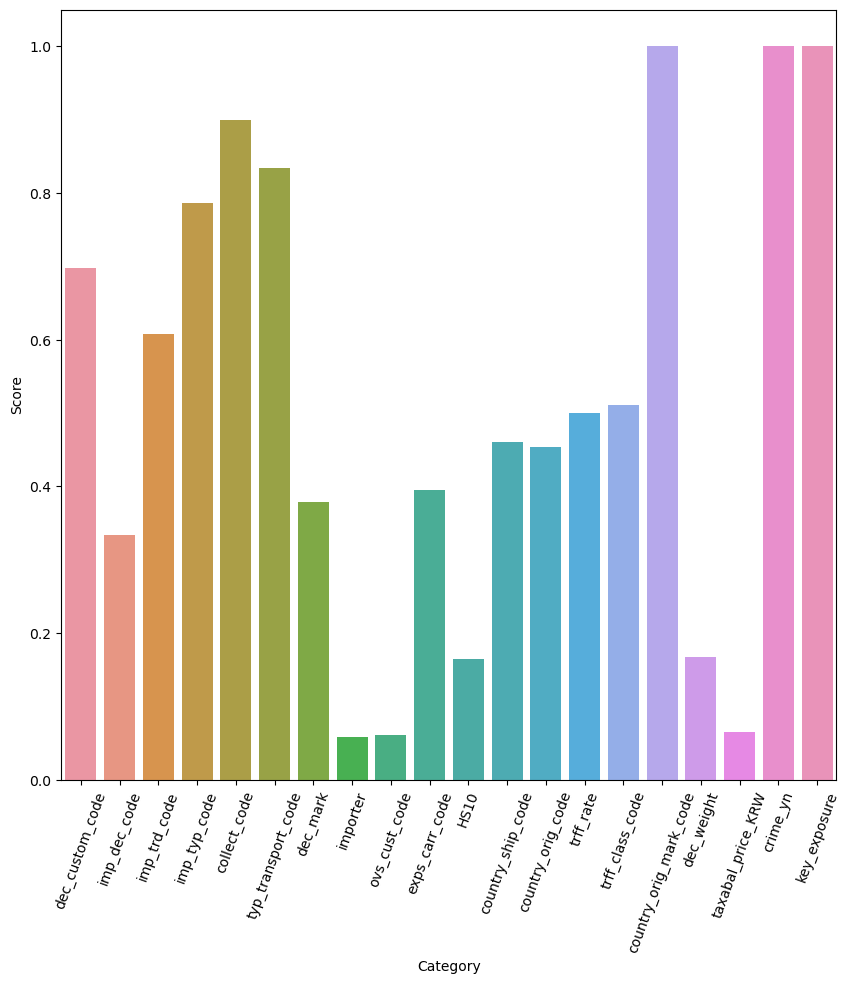

In [21]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('Greys', 1)
sns.barplot(x='Category',y ='Score', data = Total_score[Total_score['Score'] > 0])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.xticks(rotation =70)

- We can see that the categorical columns with a small number of unique values, such as 'country_orig_mark_code', 'crime_yn', and 'key_exposure', tend to have high coverage scores. 
- As expected, the coverage score of the 'imp_dec_code' column is low.

